In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())
 
if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import numpy as np
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3] 

from grafica import *
from ClassNeuronaGral import NeuronaGradiente

In [3]:
# Ejemplos de entrada de la función AND
X = np.array([[0,0], [0,1],[1,0],[1,1]])
X = 2*X-1
T = np.array([0,0,0,1])

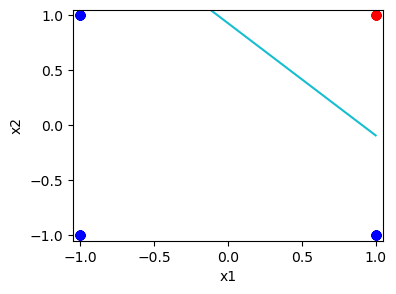

In [4]:
funcion = 'sigmoid'
if (funcion=='tanh'):
    T=2*T-1
    
ppn = NeuronaGradiente(alpha=0.15, n_iter=40, cotaE=1e-05, FUN=funcion, random_state=None, draw=1, title=['x1', 'x2'])
ppn.fit(X,T)

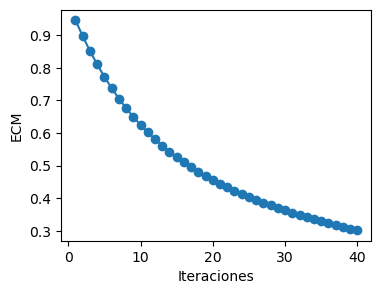

In [5]:
plt.clf()
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

In [6]:
umbral = 0.5   # corresponde a la función sigmoide entre 0 y 1

if (funcion=='tanh'):
    umbral = 0  

Y = (ppn.predict(X)>umbral)*1
print("Y = ", Y)
print("T = ", T)
aciertos = sum(Y == T)
print("aciertos = %d   (%.2f%%)" % (aciertos, 100*aciertos/X.shape[0]))


Y =  [0 0 0 1]
T =  [0 0 0 1]
aciertos = 4   (100.00%)


In [7]:
Y2 = ppn.predict(X)
print(Y2)

[0 0 0 1]


In [8]:
ppn.predict_nOut(X)

array([0.08161103, 0.3147757 , 0.32183498, 0.71041881])

In [9]:
print( 'accuracy = ' , 100 * ppn.accuracy(X,T), '%')

accuracy =  100.0 %
